## <center>What is the Machine Learning</center>

![KaVe](images/KaVe.jpg)


### <center>Celsius(X) to Fahrenheit(y) with using Linear Regression</center>

In [1]:
!python -V
!conda env list

Python 3.6.8 :: Anaconda, Inc.


# conda environments:
#
base                     C:\ProgramData\Anaconda3
py36                  *  C:\ProgramData\Anaconda3\envs\py36
py36_gpu                 C:\ProgramData\Anaconda3\envs\py36_gpu



In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import xlrd
import os
import matplotlib.pyplot as plt

In [3]:
print("Working Directory:", os.getcwd())
print("Numpy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("xlrd Version:", xlrd.__version__)

Working Directory: C:\Users\Metin USLU\Desktop\KaVe2019
Numpy Version: 1.15.4
Pandas Version: 0.24.1
xlrd Version: 1.2.0


In [4]:
data = pd.read_excel('data/dataset.xlsx', index=False, index_col=None, header=0, sheet_name='Sheet1', skiprows=0)

data.head()
# data.tail()

,Celsius,Fahrenheit
0,-65,-85.0
1,-52,-61.6
2,-40,-40.0
3,-26,-14.8
4,-19,-2.2


In [5]:
print("Data Features:", data.columns)
print("Data Dimension:", data.ndim)
print("Data Shape:", data.shape)
print("Data Size:", data.size)

Data Features: Index(['Celsius', 'Fahrenheit'], dtype='object')
Data Dimension: 2
Data Shape: (50, 2)
Data Size: 100


In [6]:
X = data.iloc[:, :-1]
y = data.iloc[:, 1]
print(type(X))
print(type(y))

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = .10, random_state = 0, shuffle=True)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
print("X_Train Shape:", X_Train.shape)
print("X_Test Shape:", X_Test.shape)
print("y_Train Shape:", y_Train.shape)
print("y_Test Shape:", y_Test.shape)

X_Train Shape: (45, 1)
X_Test Shape: (5, 1)
y_Train Shape: (45,)
y_Test Shape: (5,)


In [8]:
X_Train.head()

,Celsius
27,286
38,429
31,338
22,221
4,-19


In [9]:
y_Train.head()

27    546.8
38    804.2
31    640.4
22    429.8
4      -2.2
Name: Fahrenheit, dtype: float64

In [10]:
X_Test.head()

,Celsius
28,299
11,41
10,37
41,468
2,-40


In [11]:
y_Test.head()

28    570.2
11    105.8
10     98.6
41    874.4
2     -40.0
Name: Fahrenheit, dtype: float64

### Create the Linear Regression

In [12]:
model = linear_model.LinearRegression()

In [13]:
model.fit(X_Train, y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
y_Pred = model.predict(X_Test)
y_Pred

array([570.2, 105.8,  98.6, 874.4, -40. ])

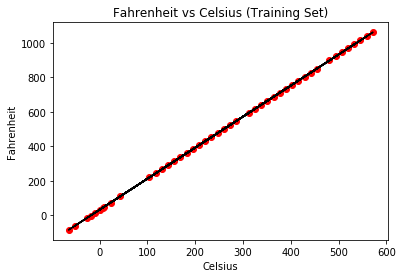

In [15]:
plt.scatter(X_Train, y_Train, color = 'red')
plt.plot(X_Train, model.predict(X_Train), color = 'black')
plt.title('Fahrenheit vs Celsius (Training Set)')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

In [16]:
print(X_Test)
print(y_Test)

    Celsius
28      299
11       41
10       37
41      468
2       -40
28    570.2
11    105.8
10     98.6
41    874.4
2     -40.0
Name: Fahrenheit, dtype: float64


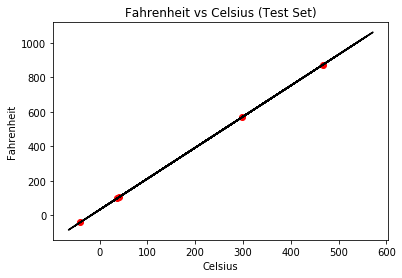

In [17]:
plt.scatter(X_Test, y_Test, color = 'red')
plt.plot(X_Train, model.predict(X_Train), color = 'black')
plt.title('Fahrenheit vs Celsius (Test Set)')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

In [18]:
model.score(X, y)

r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [19]:
print('Coefficients: \n', model.coef_)
# print('slope:', model.coef_)

Coefficients: 
 [1.8]


In [20]:
print('intercept:', model.intercept_)

intercept: 31.999999999999773


In [21]:
print("Mean squared error: %.2f" % mean_squared_error(y_Test, y_Pred))

Mean squared error: 0.00


In [22]:
print('Variance score: %.2f' % r2_score(y_Test, y_Pred))

Variance score: 1.00


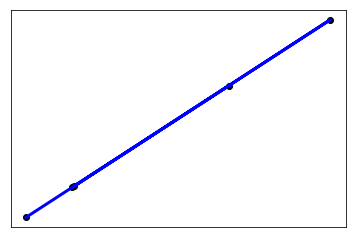

In [23]:
plt.scatter(X_Test, y_Test,  color='black')
plt.plot(X_Test, y_Pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [24]:
print("Fahrenheit = Celsius*{} + {}".format(model.coef_[0], model.intercept_) )

Fahrenheit = Celsius*1.800000000000001 + 31.999999999999773


In [25]:
print("Celsius to Fahrenheit with using Linear Regression")
print("100 Celsius equal to Fahrenheit:", model.predict([[100]]))

Celsius to Fahrenheit with using Linear Regression
100 Celsius equal to Fahrenheit: [212.]


## <center>Create Function: Cel2Fah</center>

In [26]:
def Cel2Fah(C):
    F = C * 1.8 + 32
    return F

In [27]:
print("Celsius to Fahrenheit:", Cel2Fah(100))

Celsius to Fahrenheit: 212.0
